In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

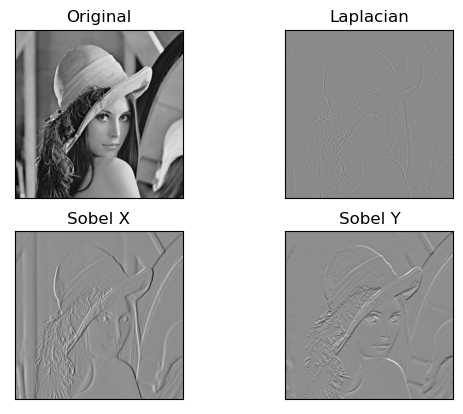

In [5]:
img = cv2.imread('lena.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

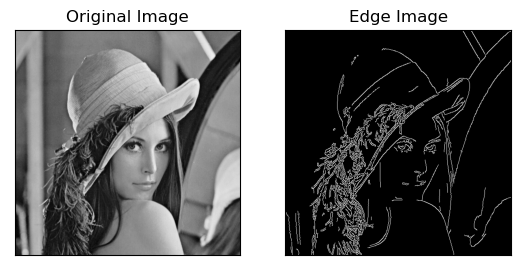

In [6]:
img = cv2.imread('lena.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


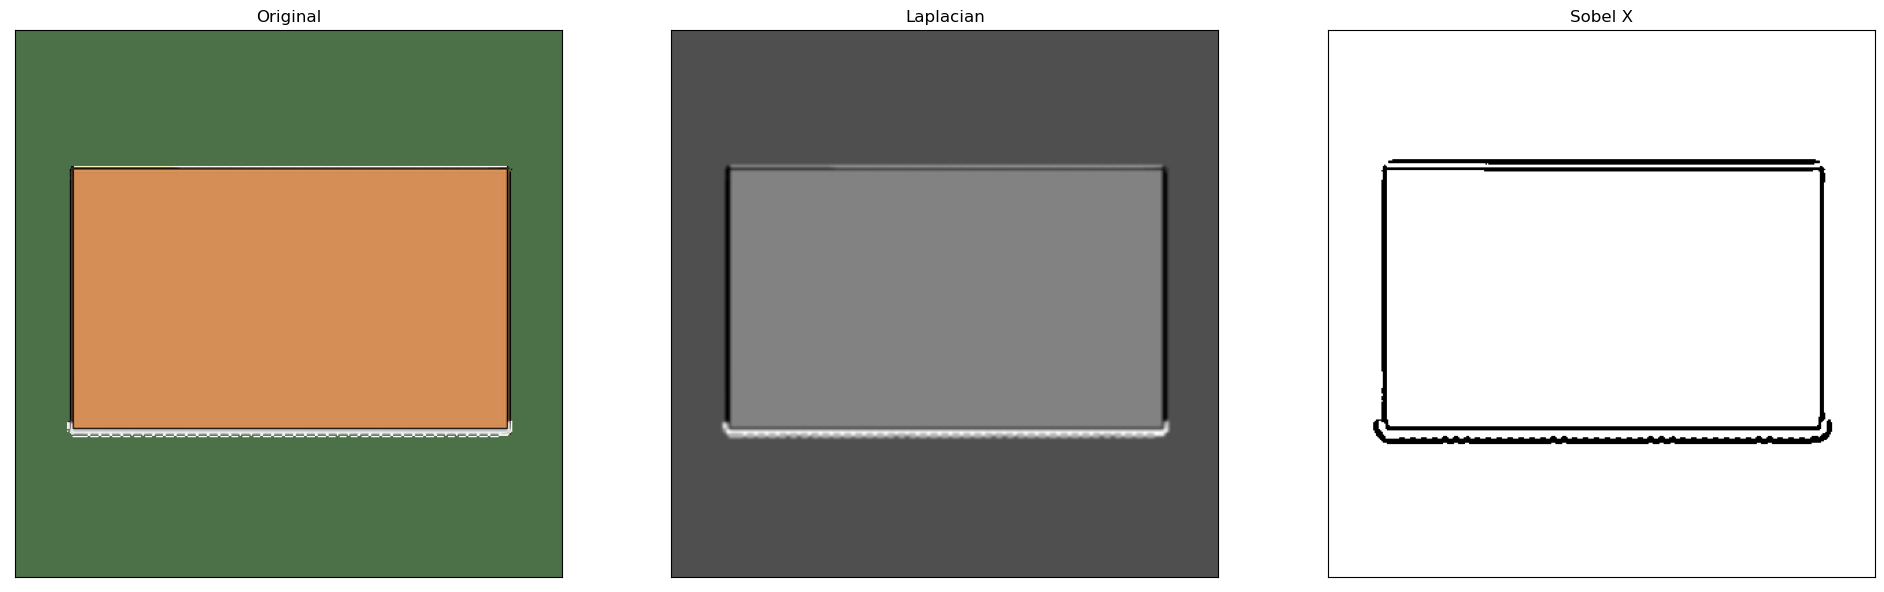

In [2]:
im = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
# ret,thresh = cv2.threshold(imgray,245,255,0)
thresh = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.show()


In [3]:
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

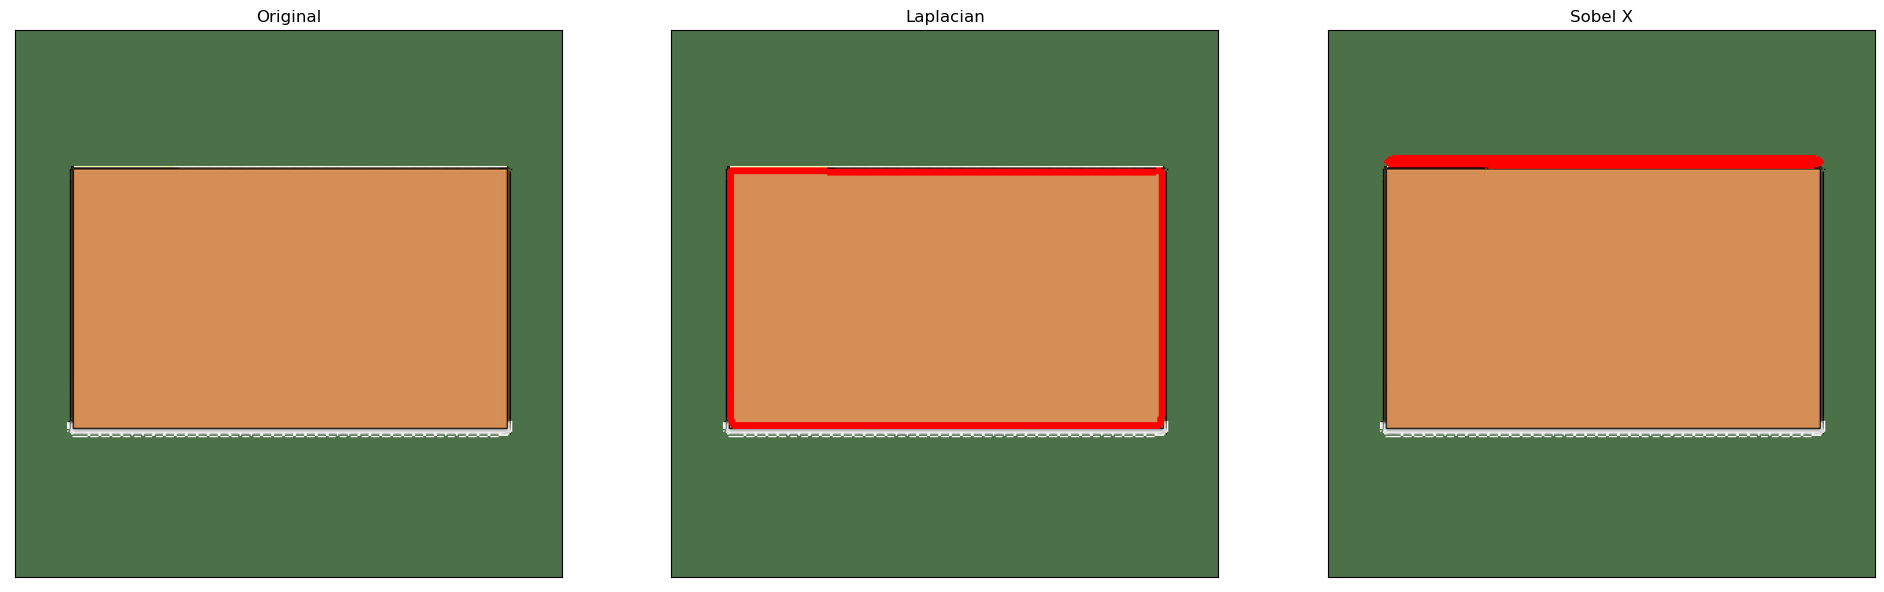

In [4]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.show()


In [5]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

{'m00': 58337.5, 'm10': 11688356.166666666, 'm01': 11455312.166666666, 'm20': 2824593489.9166665, 'm11': 2295873235.7916665, 'm02': 2416148073.9166665, 'm30': 759445116282.05, 'm21': 554861902429.1833, 'm12': 484326772253.35, 'm03': 539929049345.05005, 'mu20': 482743566.9879384, 'mu11': 715428.1319279671, 'mu02': 166751427.92084312, 'mu30': 74004519.66308594, 'mu21': -69737229.09992981, 'mu12': -47603482.87031174, 'mu03': 19994.337951660156, 'nu20': 0.14184723262318658, 'nu11': 0.00021021823509311254, 'nu02': 0.048997501373492874, 'nu30': 9.003030250403143e-05, 'nu21': -8.483892416629486e-05, 'nu12': -5.7912084053393495e-05, 'nu03': 2.4324139962679912e-08}


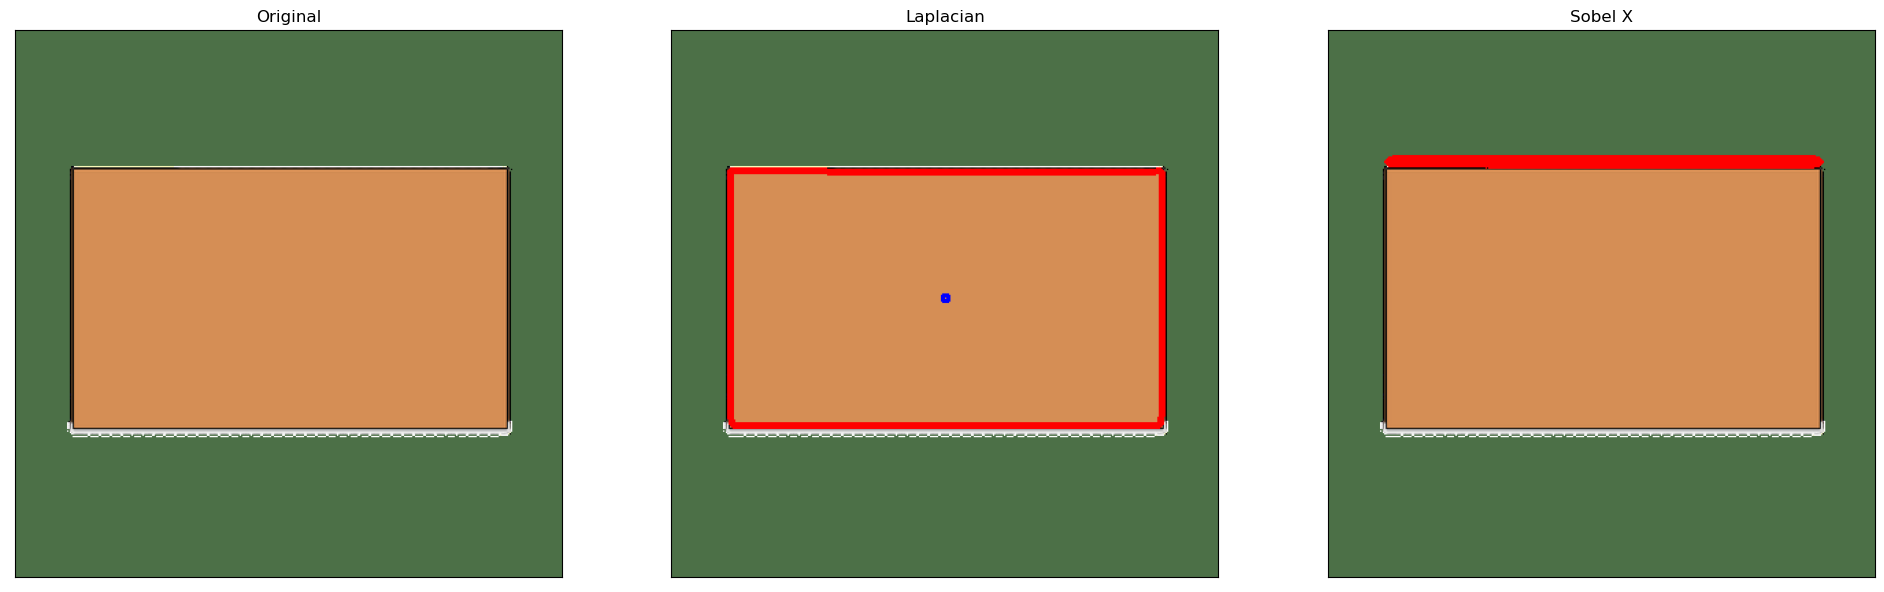

In [6]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.show()